In [1]:
from os.path import expanduser, join
import sys
user_home_dir = expanduser('~')
sys.path.insert(0, join(user_home_dir, "emu-utilities"))
from emu_utilities import tracer, resample



In [2]:
import numpy as np
import datetime
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.io import loadmat
import xarray as xr
import math
import h5py
import pandas as pd
import re
from pathlib import Path
import os
from glob import glob 
from os.path import join
import cmocean
from xgcm import Grid
from scipy.interpolate import griddata
import geopandas as gpd
from scipy import interpolate
from scipy.signal import butter, lfilter, freqz
from scipy import signal
import matplotlib.dates as mdates
from pandas.tseries.offsets import Day, BDay
import rioxarray
from shapely.geometry import mapping
import numpy.ma as ma
import cmocean
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint
import importlib
#import ecco_v4_py as ecco
import gsw
#from ecco_v4_py import resample_to_latlon
import cartopy.util as cutil
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import detrend
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
import pandas as pd

In [3]:
NOTEBOOK_DIR = Path().resolve()
FIGURES_DIR = Path(NOTEBOOK_DIR / "../../figures").resolve()

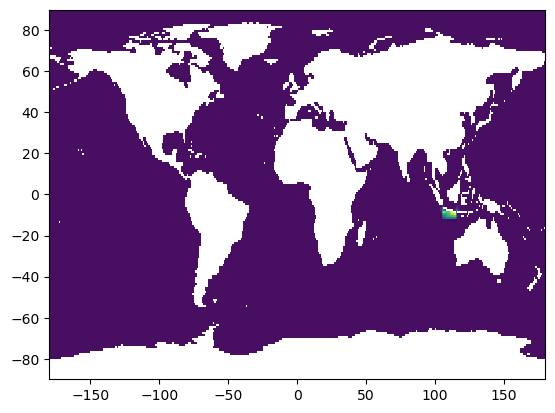

In [4]:
trcr_10_ds = tracer.load_tracer_gradient("/efs_ecco/sjarugul/Project_Datasets/emu_trc_6787_6210_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0/")
trcr_10_ds = resample.resample_ds(
    trcr_10_ds,
    -90,
    90,
    1,
    -180, 
    180, 
    1,
    mapping_method="nearest_neighbor"
)
plt.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"], trcr_10_ds["tracer"].isel(time=-1, k=0).values)

In [5]:
trcr_10_ds

<xarray.Dataset> Size: 264MB
Dimensions:                  (time: 20, k: 50, lat: 180, lon: 360)
Coordinates:
  * time                     (time) datetime64[ns] 160B 2008-12-31T12:00:00 ....
  * k                        (k) int64 400B 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
    z                        (k) float32 200B -5.0 -15.0 ... -5.906e+03
  * lat                      (lat) float64 1kB -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                      (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
Data variables:
    tracer                   (time, k, lat, lon) float32 259MB nan nan ... nan
    tracer_depth_integrated  (time, lat, lon) float32 5MB nan nan ... 0.0 0.0
Attributes:
    created:   2025-05-30T16:43:59.625613
    run_name:  emu_trc_6787_6210_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0
    tool:      trc

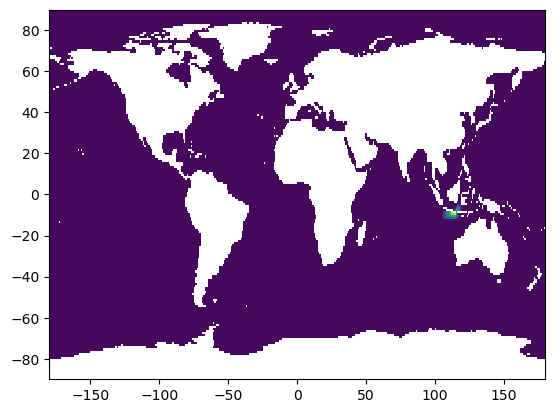

In [6]:
# Plot for 1994 tracer run

trcr_94_ds = tracer.load_tracer_gradient("/efs_ecco/sjarugul/Project_Datasets/emu_trc_943_366_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0/")
trcr_94_ds = resample.resample_ds(
    trcr_94_ds,
    -90,
    90,
    1,
    -180, 
    180, 
    1,
    mapping_method="nearest_neighbor"
)
plt.pcolormesh(trcr_94_ds["lon"], trcr_94_ds["lat"], trcr_94_ds["tracer"].isel(time=-1, k=0).values)


In [7]:
trcr_94_ds

<xarray.Dataset> Size: 251MB
Dimensions:                  (time: 19, k: 50, lat: 180, lon: 360)
Coordinates:
  * time                     (time) datetime64[ns] 152B 1992-12-31T12:00:00 ....
  * k                        (k) int64 400B 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
    z                        (k) float32 200B -5.0 -15.0 ... -5.906e+03
  * lat                      (lat) float64 1kB -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                      (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
Data variables:
    tracer                   (time, k, lat, lon) float32 246MB nan nan ... nan
    tracer_depth_integrated  (time, lat, lon) float32 5MB nan nan ... 0.0 0.0
Attributes:
    created:   2025-05-30T16:44:02.353738
    run_name:  emu_trc_943_366_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0
    tool:      trc

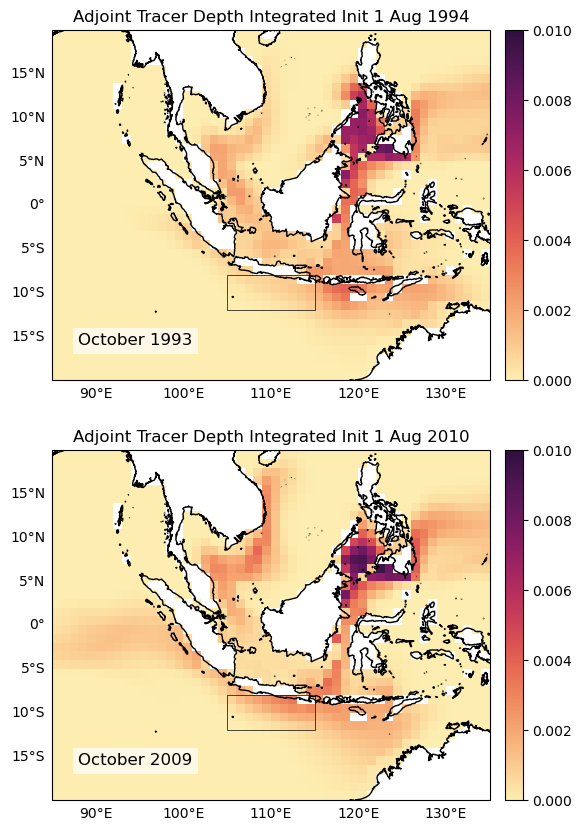

In [8]:
cm=cmocean.cm.matter


fig, ax = plt.subplots(2, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for 1994
ax0 = ax[0]
pcm = ax0.pcolormesh(trcr_94_ds["lon"], trcr_94_ds["lat"], 
                     trcr_94_ds["tracer_depth_integrated"].isel(time=-1).values/trcr_94_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.01,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Adjoint Tracer Depth Integrated Init 1 Aug 1994")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='k',
                                 transform=ccrs.PlateCarree()))
init_time0 = pd.Timestamp(trcr_94_ds.time[-1].values)
text0 = ax0.text(88, -16, init_time0.strftime("%B %Y"),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm, ax=ax0, pad=0.02)

# Plot for 2010
ax1 = ax[1]
pcm1 = ax1.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"],
                      trcr_10_ds["tracer_depth_integrated"].isel(time=-1).values/trcr_10_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.01,cmap=cm,
                      transform=ccrs.PlateCarree())
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Adjoint Tracer Depth Integrated Init 1 Aug 2010")
ax1.coastlines('10m')
gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl1.top_labels = False
gl1.right_labels = False
gl1.bottom_labels = True
ax1.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='k',
                                 transform=ccrs.PlateCarree()))
init_time1 = pd.Timestamp(trcr_10_ds.time[-1].values)
text1 = ax1.text(88, -16, init_time1.strftime("%B %Y"),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm1, ax=ax1, pad=0.02)

# Update function for animation
def update(frame):
    t94_idx = len(trcr_94_ds["time"]) - frame - 1
    t10_idx = len(trcr_10_ds["time"]) - frame - 1

    pcm.set_array(trcr_94_ds["tracer_depth_integrated"].isel(time=t94_idx).values.flatten()/trcr_94_ds["tracer_depth_integrated"].isel(time=t94_idx).sum(dim=["lat", "lon"]).values.flatten())
    pcm1.set_array(trcr_10_ds["tracer_depth_integrated"].isel(time=t10_idx).values.flatten()/trcr_10_ds["tracer_depth_integrated"].isel(time=t10_idx).sum(dim=["lat", "lon"]).values.flatten())

    # Update time text
    text0.set_text((init_time0 - pd.DateOffset(months=frame)).strftime("%B %Y"))
    text1.set_text((init_time1 - pd.DateOffset(months=frame)).strftime("%B %Y"))

    return pcm, pcm1, text0, text1

# Create animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=2000, blit=True)

# Save to gif
ani.save(FIGURES_DIR / "poster_pres_figs/AdjointTracer_DepthIntegrated_1994_2010_animation.gif", writer='pillow', dpi=100)


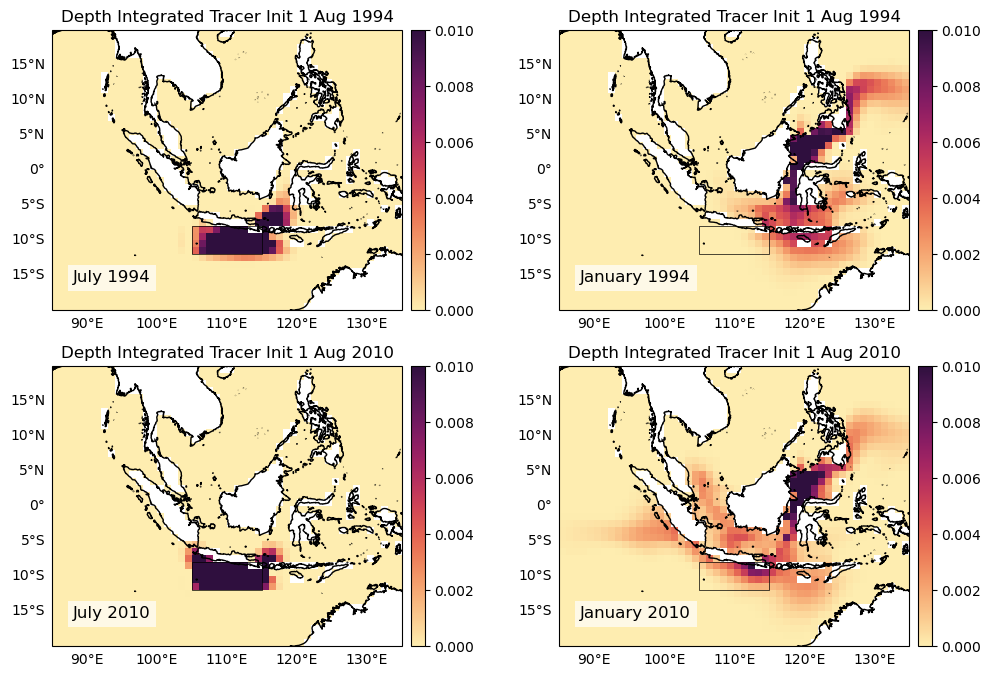

In [9]:
# Plot maps of depth integrated tracer figures - 4 panels
cm=cmocean.cm.matter

fig, ax = plt.subplots(2,2, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for 1994
ax0 = ax[0,0]
pcm = ax0.pcolormesh(trcr_94_ds["lon"], trcr_94_ds["lat"], 
                     trcr_94_ds["tracer_depth_integrated"].isel(time=-1).values/trcr_94_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.01,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Depth Integrated Tracer Init 1 Aug 1994")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='k',
                                 transform=ccrs.PlateCarree()))
text0 = ax0.text(88, -16, trcr_94_ds.time[-1].dt.strftime("%B %Y").item(),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm, ax=ax0, pad=0.02)

ax0 = ax[0,1]
pcm = ax0.pcolormesh(trcr_94_ds["lon"], trcr_94_ds["lat"], 
                     trcr_94_ds["tracer_depth_integrated"].isel(time=-6).values/trcr_94_ds["tracer_depth_integrated"].isel(time=-6).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.01,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Depth Integrated Tracer Init 1 Aug 1994")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='k',
                                 transform=ccrs.PlateCarree()))
text0 = ax0.text(88, -16, trcr_94_ds.time[-6].dt.strftime("%B %Y").item(),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm, ax=ax0, pad=0.02)

##----------------------------------------------------

ax0 = ax[1,0]
pcm = ax0.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"], 
                     trcr_10_ds["tracer_depth_integrated"].isel(time=-1).values/trcr_10_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.01,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Depth Integrated Tracer Init 1 Aug 2010")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='k',
                                 transform=ccrs.PlateCarree()))
text0 = ax0.text(88, -16, trcr_10_ds.time[-1].dt.strftime("%B %Y").item(),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm, ax=ax0, pad=0.02)

ax0 = ax[1,1]
pcm = ax0.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"], 
                     trcr_10_ds["tracer_depth_integrated"].isel(time=-7).values/trcr_10_ds["tracer_depth_integrated"].isel(time=-7).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.01,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Depth Integrated Tracer Init 1 Aug 2010")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='k',
                                 transform=ccrs.PlateCarree()))
text0 = ax0.text(88, -16, trcr_10_ds.time[-7].dt.strftime("%B %Y").item(),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm, ax=ax0, pad=0.02)

plt.savefig(FIGURES_DIR / 'poster_pres_figs/DepthInt_Tracer_Plots_SixMonthLag_1994_2010.png', bbox_inches='tight',dpi=600)


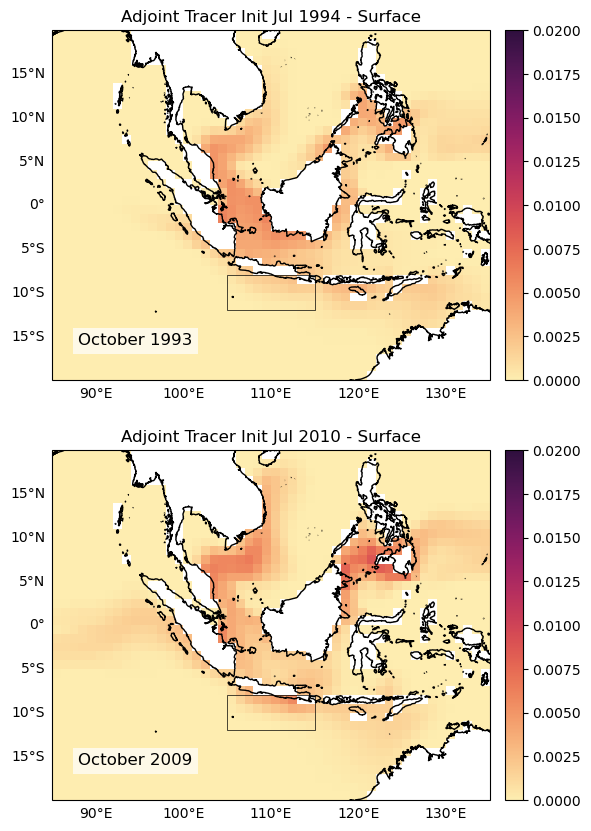

In [10]:
cm=cmocean.cm.matter

fig, ax = plt.subplots(2, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for 1994
ax0 = ax[0]
pcm = ax0.pcolormesh(trcr_94_ds["lon"], trcr_94_ds["lat"], 
                     trcr_94_ds["tracer"].isel(k=0,time=-1).values/trcr_94_ds["tracer"].isel(k=0,time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.02,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Adjoint Tracer Init Jul 1994 - Surface")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='black',
                                 transform=ccrs.PlateCarree()))
init_time0 = pd.Timestamp(trcr_94_ds.time[-1].values)
text0 = ax0.text(88, -16, init_time0.strftime("%B %Y"),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm, ax=ax0, pad=0.02)

# Plot for 2010
ax1 = ax[1]
pcm1 = ax1.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"],
                      trcr_10_ds["tracer"].isel(k=0,time=-1).values/trcr_10_ds["tracer"].isel(k=0,time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.02,cmap=cm,
                      transform=ccrs.PlateCarree())
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Adjoint Tracer Init Jul 2010 - Surface")
ax1.coastlines('10m')
gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl1.top_labels = False
gl1.right_labels = False
gl1.bottom_labels = True
ax1.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='black',
                                 transform=ccrs.PlateCarree()))
init_time1 = pd.Timestamp(trcr_10_ds.time[-1].values)
text1 = ax1.text(88, -16, init_time1.strftime("%B %Y"),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm1, ax=ax1, pad=0.02)

# Update function for animation
def update(frame):
    t94_idx = len(trcr_94_ds["time"]) - frame - 1
    t10_idx = len(trcr_10_ds["time"]) - frame - 1

    pcm.set_array(trcr_94_ds["tracer"].isel(k=0,time=t94_idx).values.flatten()/trcr_94_ds["tracer"].isel(k=0,time=t94_idx).sum(dim=["lat", "lon"]).values.flatten())
    pcm1.set_array(trcr_10_ds["tracer"].isel(k=0,time=t10_idx).values.flatten()/trcr_94_ds["tracer"].isel(k=0,time=t94_idx).sum(dim=["lat", "lon"]).values.flatten())

    # Update time text
    text0.set_text((init_time0 - pd.DateOffset(months=frame)).strftime("%B %Y"))
    text1.set_text((init_time1 - pd.DateOffset(months=frame)).strftime("%B %Y"))

    return pcm, pcm1, text0, text1

# Create animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=2000, blit=True)

# Save to gif
ani.save(FIGURES_DIR / 'poster_pres_figs/AdjointTracer_Surface_1994_2010_animation_2x1.gif', writer='pillow', dpi=300)


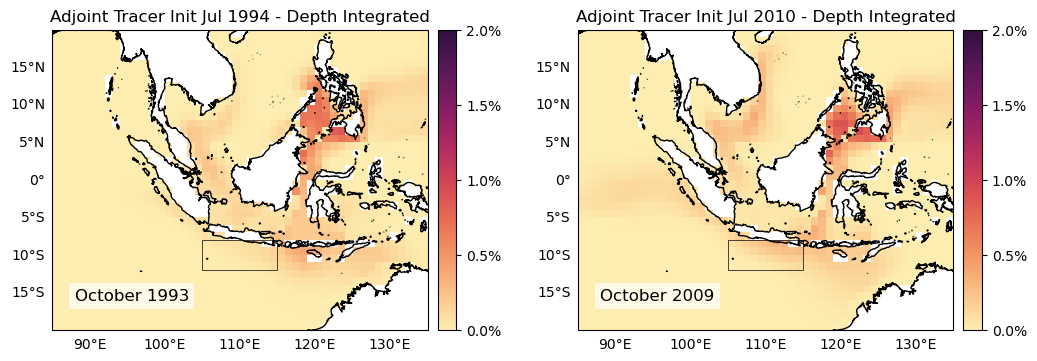

In [11]:
cm=cmocean.cm.matter

fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.3)
# Plot for 1994
ax0 = ax[0]
pcm = ax0.pcolormesh(trcr_94_ds["lon"], trcr_94_ds["lat"], 
                     trcr_94_ds["tracer_depth_integrated"].isel(time=-1).values/trcr_94_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.02,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Adjoint Tracer Init Jul 1994 - Depth Integrated")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='black',
                                 transform=ccrs.PlateCarree()))
init_time0 = pd.Timestamp(trcr_94_ds.time[-1].values)
text0 = ax0.text(88, -16, init_time0.strftime("%B %Y"),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
# plt.colorbar(pcm, ax=ax0, pad=0.02)
divider = make_axes_locatable(ax0)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cbar = plt.colorbar(pcm1, cax=ax_cb)
cbar.set_ticks(np.arange(0, 0.021, 0.005))
cbar.set_ticklabels([f"{val*100:.1f}%" for val in np.arange(0, 0.021, 0.005)])  

# Plot for 2010
ax1 = ax[1]
pcm1 = ax1.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"],
                      trcr_10_ds["tracer_depth_integrated"].isel(time=-1).values/trcr_10_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.02,cmap=cm,
                      transform=ccrs.PlateCarree())
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Adjoint Tracer Init Jul 2010 - Depth Integrated")
ax1.coastlines('10m')
gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl1.top_labels = False
gl1.right_labels = False
gl1.bottom_labels = True
ax1.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='black',
                                 transform=ccrs.PlateCarree()))
init_time1 = pd.Timestamp(trcr_10_ds.time[-1].values)
text1 = ax1.text(88, -16, init_time1.strftime("%B %Y"),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
# plt.colorbar(pcm1, ax=ax1, pad=0.02)
divider = make_axes_locatable(ax1)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cbar = plt.colorbar(pcm1, cax=ax_cb)
cbar.set_ticks(np.arange(0, 0.021, 0.005))
cbar.set_ticklabels([f"{val*100:.1f}%" for val in np.arange(0, 0.021, 0.005)])  
# Update function for animation
def update(frame):
    t94_idx = len(trcr_94_ds["time"]) - frame - 1
    t10_idx = len(trcr_10_ds["time"]) - frame - 1

    pcm.set_array(trcr_94_ds["tracer_depth_integrated"].isel(time=t94_idx).values.flatten()/trcr_94_ds["tracer_depth_integrated"].isel(time=t94_idx).sum(dim=["lat", "lon"]).values.flatten())
    pcm1.set_array(trcr_10_ds["tracer_depth_integrated"].isel(time=t10_idx).values.flatten()/trcr_94_ds["tracer_depth_integrated"].isel(time=t94_idx).sum(dim=["lat", "lon"]).values.flatten())

    # Update time text
    text0.set_text((init_time0 - pd.DateOffset(months=frame)).strftime("%B %Y"))
    text1.set_text((init_time1 - pd.DateOffset(months=frame)).strftime("%B %Y"))

    return pcm, pcm1, text0, text1

# Create animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=2000, blit=True)
# fig.set_size_inches(w,h)
# Save to gif
ani.save(FIGURES_DIR / 'poster_pres_figs/AdjointTracer_depth_integrated_1994_2010_animation_1x2.gif', writer='pillow', dpi=600)


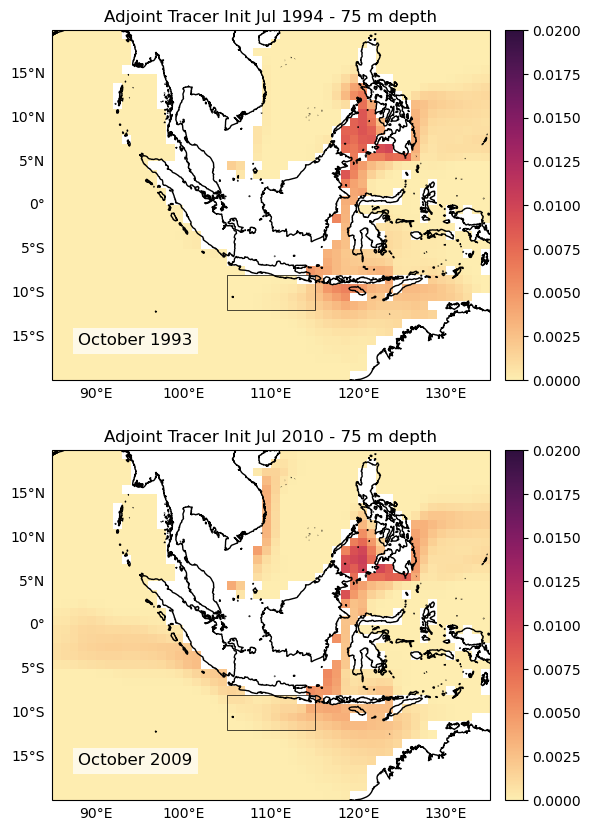

In [12]:
cm=cmocean.cm.matter

fig, ax = plt.subplots(2, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for 1994
ax0 = ax[0]
pcm = ax0.pcolormesh(trcr_94_ds["lon"], trcr_94_ds["lat"], 
                     trcr_94_ds["tracer"].isel(k=7,time=-1).values/trcr_94_ds["tracer"].isel(k=7,time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.02,cmap=cm,
                     transform=ccrs.PlateCarree())
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Adjoint Tracer Init Jul 1994 - 75 m depth")
ax0.coastlines('10m')
gl0 = ax0.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl0.top_labels = False
gl0.right_labels = False
gl0.bottom_labels = True
ax0.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax0.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='black',
                                 transform=ccrs.PlateCarree()))
text0 = ax0.text(88, -16, trcr_94_ds.time[-1].dt.strftime("%B %Y").item(),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm, ax=ax0, pad=0.02)

# Plot for 2010
ax1 = ax[1]
pcm1 = ax1.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"],
                      trcr_10_ds["tracer"].isel(k=7,time=-1).values/trcr_10_ds["tracer"].isel(k=7,time=-1).sum(dim=["lat", "lon"]).values,vmin=0,vmax=0.02,cmap=cm,
                      transform=ccrs.PlateCarree())
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Adjoint Tracer Init Jul 2010 - 75 m depth")
ax1.coastlines('10m')
gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
gl1.top_labels = False
gl1.right_labels = False
gl1.bottom_labels = True
ax1.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())
ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                 linewidth=0.5, facecolor='none', edgecolor='black',
                                 transform=ccrs.PlateCarree()))
text1 = ax1.text(88, -16, trcr_10_ds.time[-1].dt.strftime("%B %Y").item(),
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.colorbar(pcm1, ax=ax1, pad=0.02)

# Update function for animation
def update(frame):
    t94_idx = len(trcr_94_ds["time"]) - frame - 1
    t10_idx = len(trcr_10_ds["time"]) - frame - 1

    pcm.set_array(trcr_94_ds["tracer"].isel(k=7,time=t94_idx).values.flatten()/trcr_94_ds["tracer"].isel(k=7,time=t94_idx).sum(dim=["lat", "lon"]).values.flatten())
    pcm1.set_array(trcr_10_ds["tracer"].isel(k=7,time=t10_idx).values.flatten()/trcr_94_ds["tracer"].isel(k=7,time=t94_idx).sum(dim=["lat", "lon"]).values.flatten())

    # Update time text
    text0.set_text(trcr_94_ds.time[t94_idx].dt.strftime("%B %Y").item())
    text1.set_text(trcr_10_ds.time[t10_idx].dt.strftime("%B %Y").item())

    return pcm, pcm1, text0, text1

# Create animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=2000, blit=True)

# Save to gif
ani.save(FIGURES_DIR / 'AdjointTracer_75m_1994_2010_animation.gif', writer='pillow', dpi=100)


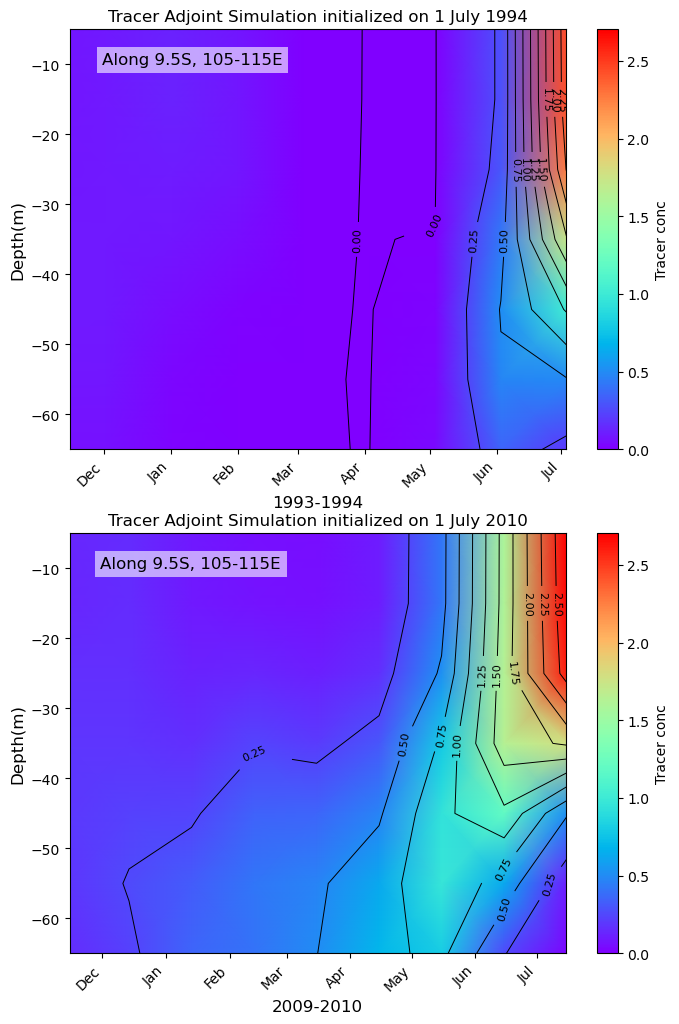

In [17]:
#Plot depth sections -

depth_array=np.array([-5.000000e+00, -1.500000e+01, -2.500000e+01, -3.500000e+01,
       -4.500000e+01, -5.500000e+01, -6.500000e+01, -7.500500e+01,
       -8.502500e+01, -9.509500e+01, -1.053100e+02, -1.158700e+02,
       -1.271500e+02, -1.397400e+02, -1.544700e+02, -1.724000e+02,
       -1.947350e+02, -2.227100e+02, -2.574700e+02, -2.999300e+02,
       -3.506800e+02, -4.099300e+02, -4.774700e+02, -5.527100e+02,
       -6.347350e+02, -7.224000e+02, -8.144700e+02, -9.097400e+02,
       -1.007155e+03, -1.105905e+03, -1.205535e+03, -1.306205e+03,
       -1.409150e+03, -1.517095e+03, -1.634175e+03, -1.765135e+03,
       -1.914150e+03, -2.084035e+03, -2.276225e+03, -2.491250e+03,
       -2.729250e+03, -2.990250e+03, -3.274250e+03, -3.581250e+03,
       -3.911250e+03, -4.264250e+03, -4.640250e+03, -5.039250e+03,
       -5.461250e+03, -5.906250e+03])

trcr_10_ds1=trcr_10_ds.assign_coords(k=depth_array)
trcr_94_ds1=trcr_94_ds.assign_coords(k=depth_array)

trc9S_2010 = trcr_10_ds1.tracer.sel(lat=-9.5,lon=slice(110,115),k=slice(-5,-70)).mean('lon').squeeze(drop=True)
trc9S_1994 = trcr_94_ds1.tracer.sel(lat=-9.5,lon=slice(110,115),k=slice(-5,-70)).mean('lon').squeeze(drop=True)


dataa10 = trc9S_2010.transpose('k', 'time').values
dataa94 = trc9S_1994.transpose('k', 'time').values

#data = np.where(data <= 0, np.nan, data)

# Plot
fig,ax = plt.subplots(2,1,figsize=(8,12))

ax1=ax[0]

im = ax1.pcolormesh(trc9S_1994.time, trc9S_1994.k, dataa94, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(dataa10))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(trc9S_1994.time, trc9S_1994.k, dataa94, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

ax1.set_ylabel('Depth(m)',size=12)
ax1.set_xlabel('1993-1994',size=12)
ax1.set_title('Tracer Adjoint Simulation initialized on 1 July 1994')
ax1.text(pd.Timestamp('1993-11-30'), -10, 'Along 9.5S, 105-115E',
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax1.set_xlim([pd.Timestamp('1993-11-15'), pd.Timestamp('1994-07-03')])
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

ax1=ax[1]

im = ax1.pcolormesh(trc9S_2010.time, trc9S_2010.k, dataa10, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(dataa10))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(trc9S_2010.time, trc9S_2010.k, dataa10, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")


ax1.set_ylabel('Depth(m)',size=12)
ax1.set_xlabel('2009-2010',size=12)
ax1.set_title('Tracer Adjoint Simulation initialized on 1 July 2010')
ax1.text(pd.Timestamp('2009-11-30'), -10, 'Along 9.5S, 105-115E',
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

ax1.set_xlim([pd.Timestamp('2009-11-15'), pd.Timestamp('2010-07-15')])
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')


plt.savefig(FIGURES_DIR / '/efs_ecco/sjarugul/Figures/Tracer_DepthSection_9S_110_115E_1994_2010.png', bbox_inches='tight',dpi=300)


In [13]:
trcr_94_ds1

<xarray.Dataset> Size: 251MB
Dimensions:                  (time: 19, k: 50, lat: 180, lon: 360)
Coordinates:
  * time                     (time) datetime64[ns] 152B 1992-12-31T12:00:00 ....
    z                        (k) float32 200B -5.0 -15.0 ... -5.906e+03
  * lat                      (lat) float64 1kB -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                      (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
  * k                        (k) float64 400B -5.0 -15.0 ... -5.906e+03
Data variables:
    tracer                   (time, k, lat, lon) float32 246MB nan nan ... nan
    tracer_depth_integrated  (time, lat, lon) float32 5MB nan nan ... 0.0 0.0
Attributes:
    created:   2025-05-30T02:30:54.366426
    run_name:  emu_trc_943_366_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0
    tool:      trc

In [14]:
trcr_10_ds1

<xarray.Dataset> Size: 264MB
Dimensions:                  (time: 20, k: 50, lat: 180, lon: 360)
Coordinates:
  * time                     (time) datetime64[ns] 160B 2008-12-31T12:00:00 ....
    z                        (k) float32 200B -5.0 -15.0 ... -5.906e+03
  * lat                      (lat) float64 1kB -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                      (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
  * k                        (k) float64 400B -5.0 -15.0 ... -5.906e+03
Data variables:
    tracer                   (time, k, lat, lon) float32 259MB nan nan ... nan
    tracer_depth_integrated  (time, lat, lon) float32 5MB nan nan ... 0.0 0.0
Attributes:
    created:   2025-05-30T02:30:51.044247
    run_name:  emu_trc_6787_6210_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0
    tool:      trc

<xarray.DataArray 'tracer' (k: 7, lon: 10)> Size: 280B
array([[1.2680382 , 1.6020088 , 1.5011919 , 1.7542158 , 1.8931994 ,
        2.0240643 , 2.1468701 , 2.3607936 , 1.5682801 , 1.7561984 ],
       [1.248475  , 1.5802579 , 1.4799727 , 1.728107  , 1.8671118 ,
        1.997968  , 2.1207485 , 2.3345807 , 1.5487113 , 1.7382526 ],
       [1.2439449 , 1.5198874 , 1.4664935 , 1.7277445 , 1.8669902 ,
        1.9979523 , 2.0968437 , 2.126163  , 2.046387  , 1.7346841 ],
       [1.0588002 , 1.251189  , 1.2681674 , 1.7146775 , 1.8457763 ,
        1.7502594 , 1.519903  , 1.3486342 , 1.4683274 , 1.4541548 ],
       [0.50662357, 0.83046144, 1.2201561 , 1.1973226 , 0.95754564,
        0.7494086 , 0.58301944, 0.50021434, 0.5773016 , 0.7774081 ],
       [0.14763775, 0.29943776, 0.36962008, 0.29136255, 0.20590621,
        0.15518834, 0.12103449, 0.10973878, 0.13592012, 0.30495727],
       [0.02293085, 0.04045185, 0.04589843, 0.03179699, 0.02234522,
        0.01734998, 0.01457124, 0.01445347, 0.01826473, 0.12794554]],
      dtype=float32)
Coordinates:
    z        (k) float32 28B -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0
  * lon      (lon) float64 80B 105.5 106.5 107.5 108.5 ... 112.5 113.5 114.5
  * k        (k) float64 56B -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0

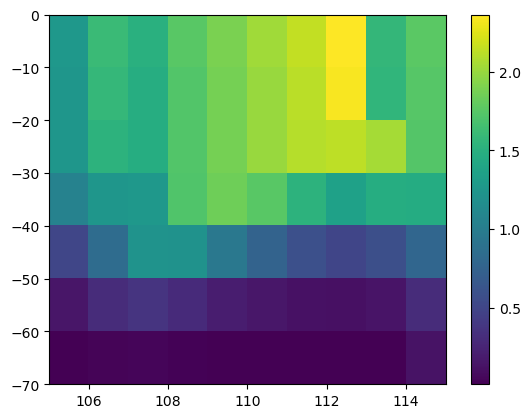

In [15]:
test=trcr_10_ds1.tracer.sel(lat=slice(-11.5,-7.5),lon=slice(105,115),k=slice(-5,-70),time='2010-07-15').mean('lat').squeeze(drop=True)
test

plt.pcolor(test.lon,test.k,test)
plt.colorbar()
test

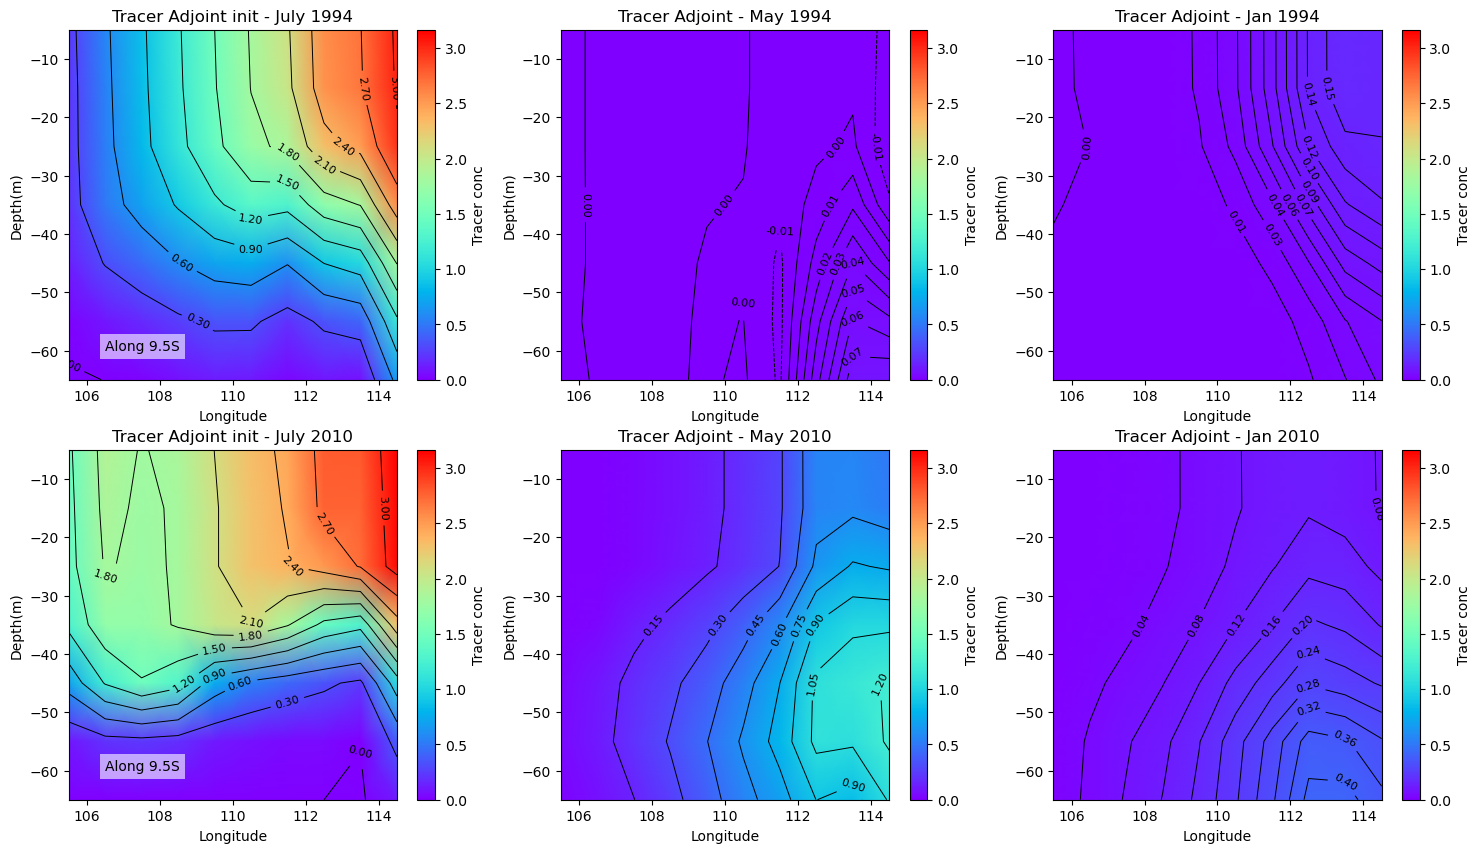

In [18]:
# Plot lon-depth section of tracer conc

#slice(-11.5,-9.5)
trc_lonsection_jul2010 = trcr_10_ds1.tracer.sel(lat=-9.5,lon=slice(105,115),k=slice(-5,-70),time='2010-07-15').squeeze(drop=True)
trc_lonsection_may2010 = trcr_10_ds1.tracer.sel(lat=-9.5,lon=slice(105,115),k=slice(-5,-70),time='2010-05-15').squeeze(drop=True)
trc_lonsection_jan2010 = trcr_10_ds1.tracer.sel(lat=-9.5,lon=slice(105,115),k=slice(-5,-70),time='2010-01-13').squeeze(drop=True)

data1 = trc_lonsection_jul2010.transpose('k', 'lon').values
data2 = trc_lonsection_may2010.transpose('k', 'lon').values
data3 = trc_lonsection_jan2010.transpose('k', 'lon').values

#slice(-11.5,-9.5)
trc_lonsection_jul1994 = trcr_94_ds1.tracer.sel(lat=-9.5,lon=slice(105,115),k=slice(-5,-70),time='1994-07-03').squeeze(drop=True)
trc_lonsection_may1994 = trcr_94_ds1.tracer.sel(lat=-9.5,lon=slice(105,115),k=slice(-5,-70),time='1994-05-03').squeeze(drop=True)
trc_lonsection_jan1994 = trcr_94_ds1.tracer.sel(lat=-9.5,lon=slice(105,115),k=slice(-5,-70),time='1994-01-01').squeeze(drop=True)

data1 = trc_lonsection_jul2010.transpose('k', 'lon').values
data2 = trc_lonsection_may2010.transpose('k', 'lon').values
data3 = trc_lonsection_jan2010.transpose('k', 'lon').values

data11 = trc_lonsection_jul1994.transpose('k', 'lon').values
data22 = trc_lonsection_may1994.transpose('k', 'lon').values
data33 = trc_lonsection_jan1994.transpose('k', 'lon').values

#data = np.where(data <= 0, np.nan, data)

# Plot
#fig, ax = plt.subplots(figsize=(10, 5))
fig,ax = plt.subplots(2,3,figsize=(18,10))

ax1=ax[0,0]

im = ax1.pcolormesh(np.array(trc_lonsection_jul1994.lon), np.array(trc_lonsection_jul1994.k), data11, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(data1))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(np.array(trc_lonsection_jul1994.lon), np.array(trc_lonsection_jul1994.k), data11, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

ax1.set_ylabel('Depth(m)')
ax1.set_xlabel('Longitude')
ax1.set_title('Tracer Adjoint init - July 1994')
ax1.text(106.5, -60, 'Along 9.5S',
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
#plt.xlim([pd.Timestamp('2009-11-15'), pd.Timestamp('2010-07-15')])
#plt.savefig('/efs_ecco/sjarugul/Figures/Tracer_LonDepthSection_9S_1Jul2010.png', bbox_inches='tight',dpi=300)

ax1=ax[0,1]

im = ax1.pcolormesh(np.array(trc_lonsection_may1994.lon), np.array(trc_lonsection_may1994.k), data22, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(data1))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(np.array(trc_lonsection_may1994.lon), np.array(trc_lonsection_may1994.k), data22, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

ax1.set_ylabel('Depth(m)')
ax1.set_xlabel('Longitude')
ax1.set_title('Tracer Adjoint - May 1994')

ax1=ax[0,2]

im = ax1.pcolormesh(np.array(trc_lonsection_jan1994.lon), np.array(trc_lonsection_may1994.k), data33, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(data1))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(np.array(trc_lonsection_may1994.lon), np.array(trc_lonsection_may1994.k), data33, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

ax1.set_ylabel('Depth(m)')
ax1.set_xlabel('Longitude')
ax1.set_title('Tracer Adjoint - Jan 1994')

#-------------------------------
ax1=ax[1,0]

im = ax1.pcolormesh(np.array(trc_lonsection_jul2010.lon), np.array(trc_lonsection_jul2010.k), data1, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(data1))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(np.array(trc_lonsection_jul2010.lon), np.array(trc_lonsection_jul2010.k), data1, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")
ax1.text(106.5, -60, 'Along 9.5S',
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax1.set_ylabel('Depth(m)')
ax1.set_xlabel('Longitude')
ax1.set_title('Tracer Adjoint init - July 2010')
#plt.xlim([pd.Timestamp('2009-11-15'), pd.Timestamp('2010-07-15')])
#plt.savefig('/efs_ecco/sjarugul/Figures/Tracer_LonDepthSection_9S_1Jul2010.png', bbox_inches='tight',dpi=300)

ax1=ax[1,1]

im = ax1.pcolormesh(np.array(trc_lonsection_may2010.lon), np.array(trc_lonsection_may2010.k), data2, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(data1))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(np.array(trc_lonsection_may2010.lon), np.array(trc_lonsection_may2010.k), data2, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

ax1.set_ylabel('Depth(m)')
ax1.set_xlabel('Longitude')
ax1.set_title('Tracer Adjoint - May 2010')

ax1=ax[1,2]

im = ax1.pcolormesh(np.array(trc_lonsection_jan2010.lon), np.array(trc_lonsection_may2010.k), data3, cmap='rainbow', shading='gouraud', vmin=0, vmax=np.nanmax(data1))
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Tracer conc')

# Overlay contours
contours = ax1.contour(np.array(trc_lonsection_may2010.lon), np.array(trc_lonsection_may2010.k), data3, levels=10, colors='black', linewidths=0.7)
ax1.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

ax1.set_ylabel('Depth(m)')
ax1.set_xlabel('Longitude')
ax1.set_title('Tracer Adjoint - Jan 2010')

plt.savefig(FIGURES_DIR / '/efs_ecco/sjarugul/Figures/Tracer_LonDepthSection_1994_2010.png', bbox_inches='tight')


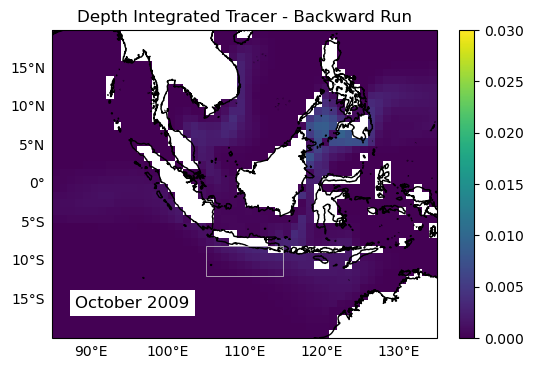

In [19]:
#Depth Integrated Tracer Animation

tc1 = (trcr_10_ds["tracer_depth_integrated"].isel(time=-1))
tc2=tc1.values / tc1.sum(dim=["lat", "lon"]).values

tc = np.where(np.isnan(tc2) | (tc2 <= 0), 1e-5, tc2)

fig, ax = plt.subplots(1, 1, figsize=(14, 4), subplot_kw={'projection': ccrs.PlateCarree()})

#ax1=ax[0]
# Setup shared properties
def setup_ax(axx, title):
    pcm = axx.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"],
                         tc,vmin=0, vmax=0.03,
                         transform=ccrs.PlateCarree())
    
    axx.set_xlabel("Longitude")
    axx.set_ylabel("Latitude")
    axx.set_title(title)
    axx.coastlines('10m', zorder=1)
    gl = axx.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    axx.set_extent([85, 135, -20, 20], crs=ccrs.PlateCarree())

    axx.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,
                                     linewidth=0.5, facecolor='none',
                                     edgecolor='lightgray',
                                     transform=ccrs.PlateCarree()))

    cb = plt.colorbar(pcm, ax=axx, pad=0.02)
    return pcm

# Create initial plots
pcm0 = setup_ax(ax, title="Depth Integrated Tracer - Backward Run")
#pcm1 = setup_ax(ax[1], k=5, title="Backward tracer run: Depth = 50")

# Initial time label
initial_time = trcr_10_ds.time[-1].dt.strftime("%B %Y").item()
text0 = ax.text(88, -16, initial_time, fontsize=12,
                   bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
#text1 = ax[1].text(88, -16, initial_time, fontsize=12,
                   #bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Animation update function
def update(frame):
    time_idx = len(trcr_10_ds["time"]) - frame - 1

    # Update data
    pcm0.set_array(trcr_10_ds["tracer_depth_integrated"].isel(time=time_idx).values.flatten()/ trcr_10_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values.flatten())
    #pcm1.set_array(trcr_10_ds["tracer"].isel(k=5, time=time_idx).values.flatten())

    # Update date text
    new_time = trcr_10_ds.time[time_idx].dt.strftime("%B %Y").item()
    text0.set_text(new_time)
    #text1.set_text(new_time)

    return pcm0,text0

# Create animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=2000, blit=True)

# Save to gif
#ani.save('Depth_Integrated_Tracer_July2010.gif', writer='pillow')
ani.save(
    FIGURES_DIR / 
    'Depth_Integrated_Tracer_July2010.gif',
    writer='pillow',
    dpi=100,
    savefig_kwargs={'bbox_inches': 'tight', 'pad_inches': 0}
)

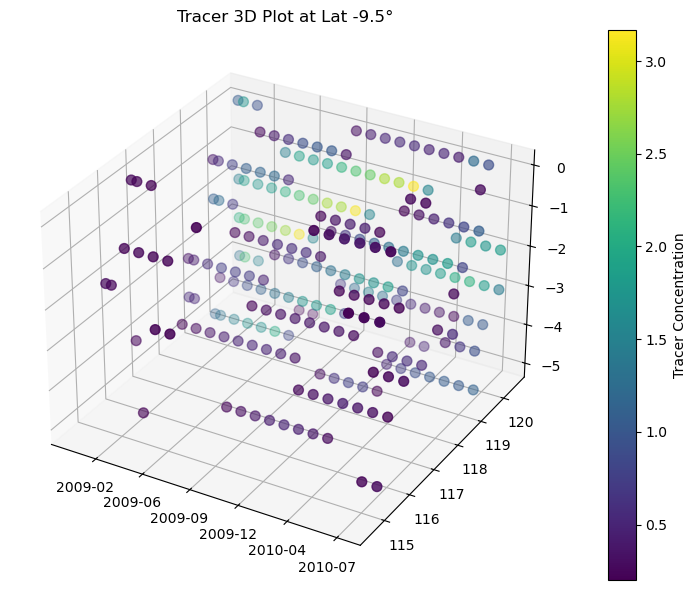

In [21]:

# Select nearest lat
lat_sel = -9.5
tracer_sel = trcr_10_ds.sel(lat=lat_sel,lon=slice(105.5,120.5),k=slice(0,5))

# Extract axes
lon = tracer_sel['lon'].values
depth = tracer_sel['k'].values
time = mdates.date2num(tracer_sel['time'].values)  # Convert to float
tracerr = tracer_sel['tracer'].values  # shape: (time, depth, lon)

#tracer_vals = tracer_ds['tracer'].values
tracerr[tracerr < 0.2] = np.nan

# Create meshgrid
T, D, L = np.meshgrid(depth, lon, time)  # Shape: (time, depth, lon)

# Flatten for 3D plot
T_flat = T.flatten()
D_flat = D.flatten()
L_flat = L.flatten()
V_flat = tracerr.flatten()

# Apply mask for values greater than 1
#mask = V_flat > 1

# Filter arrays
#T_filtered = T_flat[mask]
#D_filtered = D_flat[mask]
#L_filtered = L_flat[mask]
#V_filtered = V_flat[mask]

# 3D Scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(L_flat, D_flat, -T_flat, c=V_flat, cmap='viridis', s=50)

#ax.set_xlabel("Longitude")
#ax.set_ylabel("Depth (m)")
#ax.set_zlabel("Time")
ax.set_title(f"Tracer 3D Plot at Lat {lat_sel}°")

# Format z-axis ticks back to readable dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.colorbar(sc, ax=ax, label="Tracer Concentration")
plt.tight_layout()
plt.show()
